In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

class KMeans:
    def __init__(self, K = 3, max_ters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_ters
        self.plot_steps = plot_steps

        #store the list of sample indices for each cluster
        #if a sample belongs to a cluster it's index is stored in the 
        #list of that cluster
        self.clusters = [[] for _ in range(self.K)]
        
        #the mean vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X 
        self.n_samples, self.n_features = X.shape

        #randomly initialize the centroid. Note that a random sample should be 
        #chosen from withing the dataset i.e X

        random_sample_idx = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idx]

        #optimize the clusters
        for _ in range(self.max_iters):
            #assign the samples to the closest centroid 
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            #calculate the new centoids from the clusters 
            #store the old centoids for later comparison
            centroids_old = self.centroids
            #update the centroids 
            self.centroids = self._get_centroids(self.clusters)

            #break out of the loop if there is no change in the centroid
            if self._is_converged(centroids_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        #create an empty cluster list 
        clusters = [[] for _ in range(self.K)]
        #loop through the data retriving a sample and its corresponding index 
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            #remember that in the cluster what is appended is the sample idx 
            #but to which cluster exaclty. The cluster with the same index as the just returned 
            #centroid index
            clusters[centroid_idx].append(idx)
            
        return clusters
    
    def _closest_centroid(Self, sample, centroid):
        #calculate the distance of the current sample to each centroid 
        distances = [euclidean_distance(sample, point) for point in centroid]
        closest_index = np.argmin(distances)
        return closest_index
    

    def _get_centroids(self, clusters):
        #assign the mean value of the clusters to the centroid
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        
        return centroids

    
    def _is_converged(self,centroids_old, centroids):
        #distance between old and new centoid for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    

    def _get_cluster_labels(self, clusters):
        #each sample will get the label of the cluster it was assigned to 
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)


        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
        

In [8]:
np.random.seed(42)
X, y = datasets.make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=10)
clusters = len(np.unique(y))
print(clusters)

3


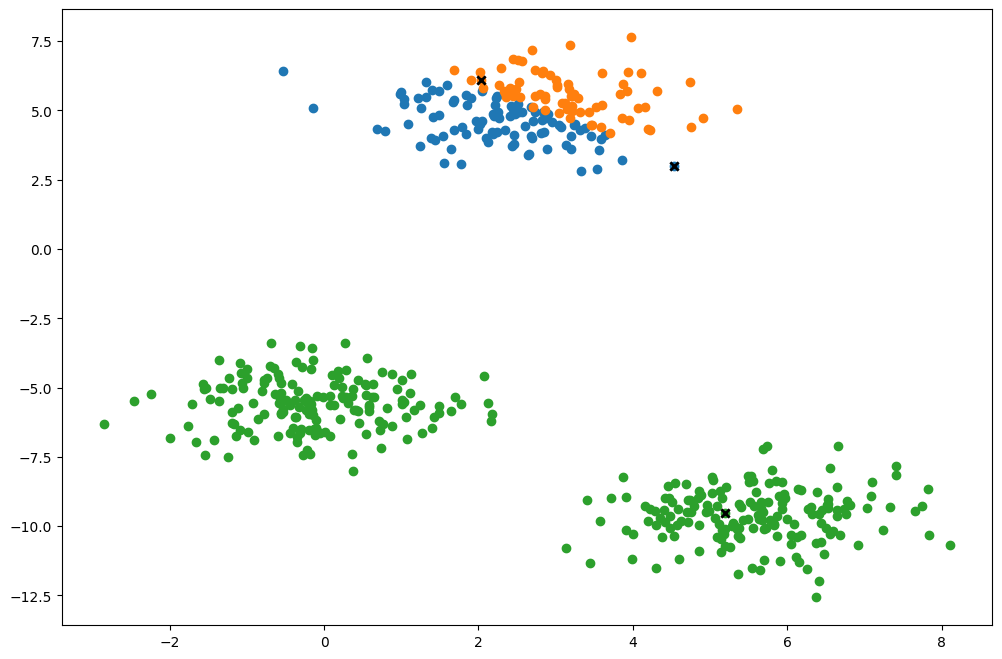

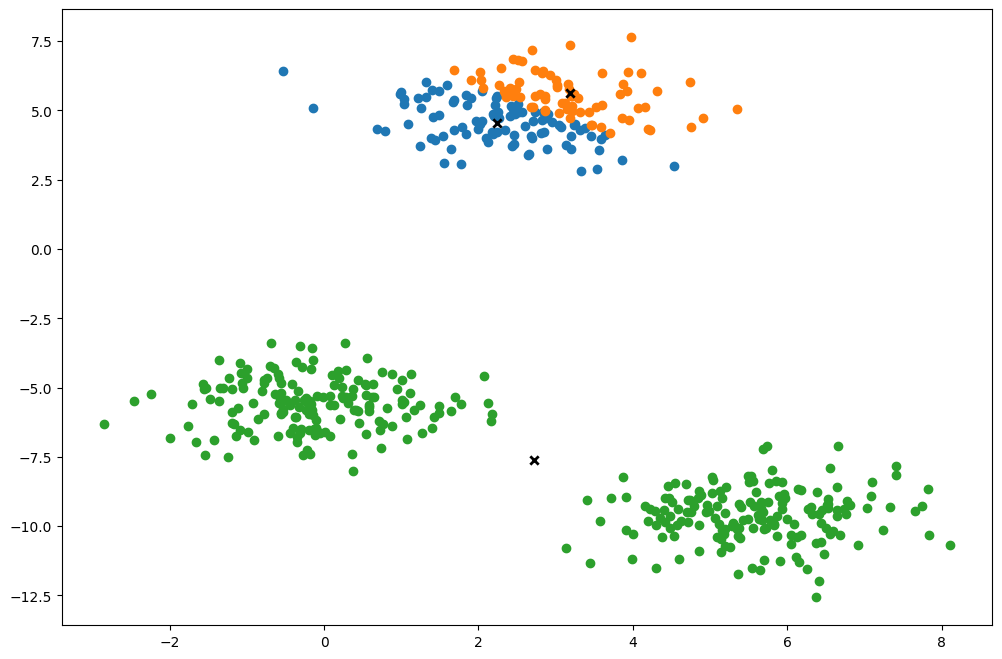

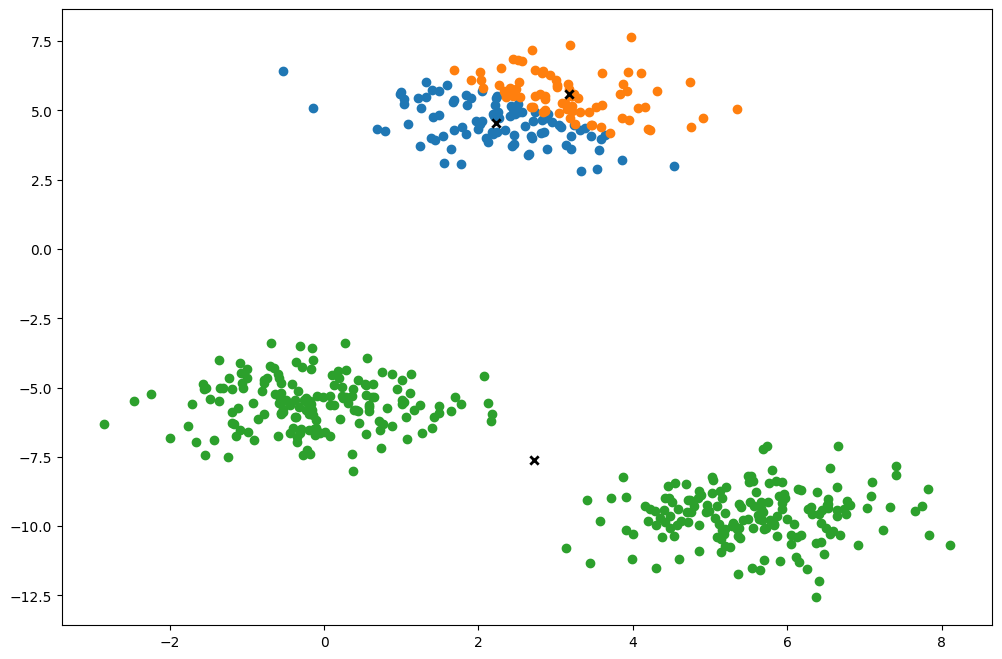

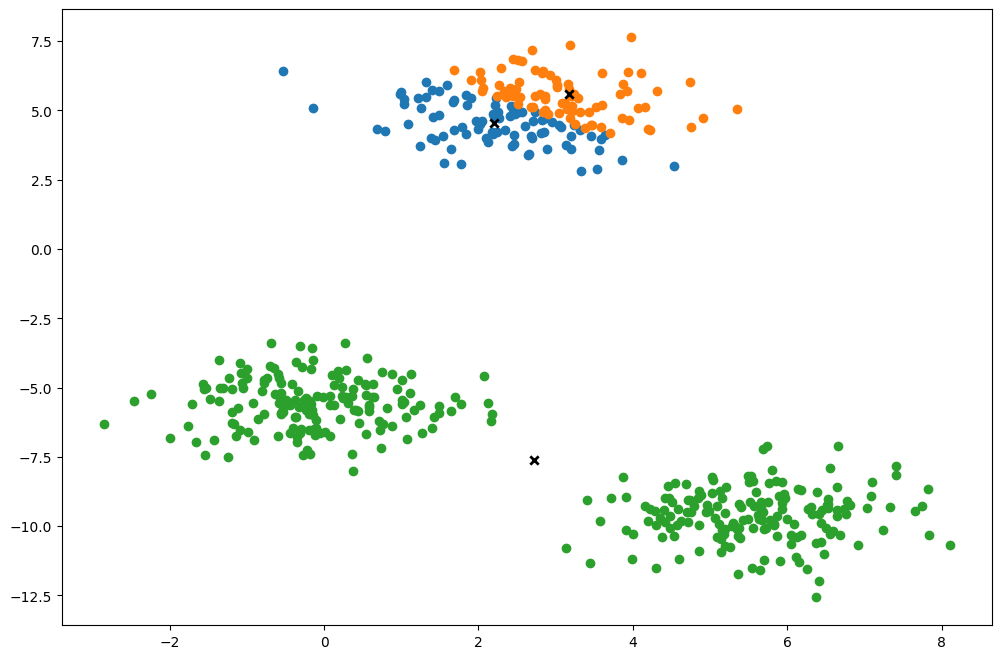

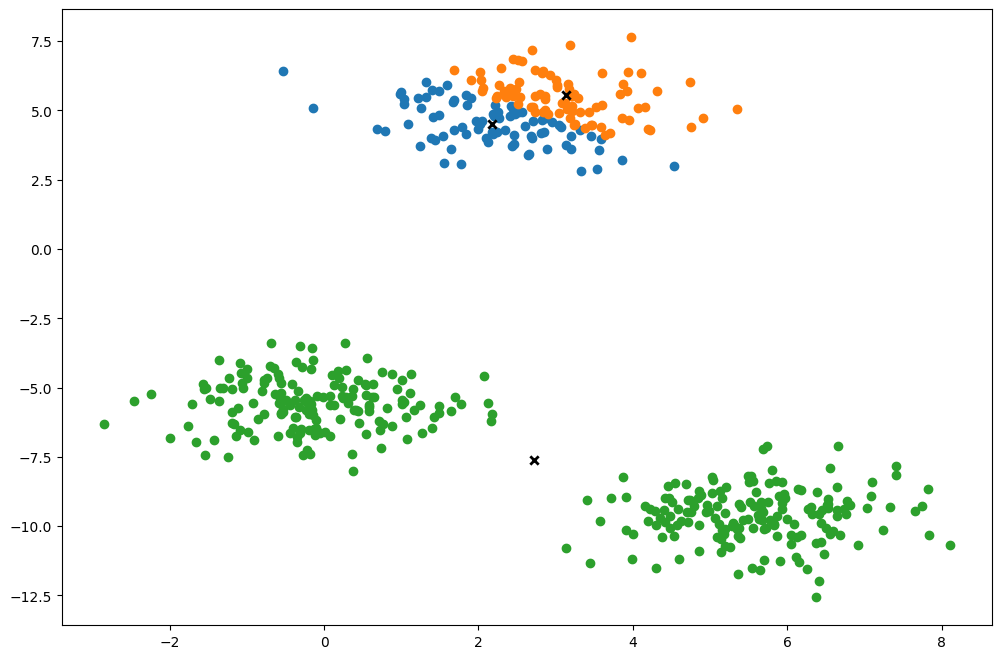

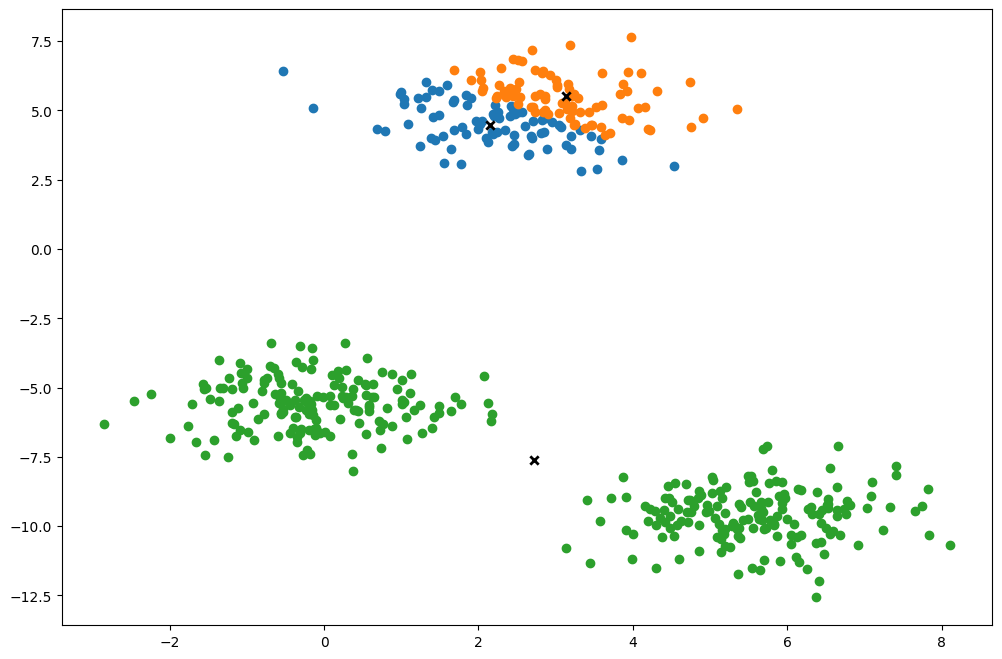

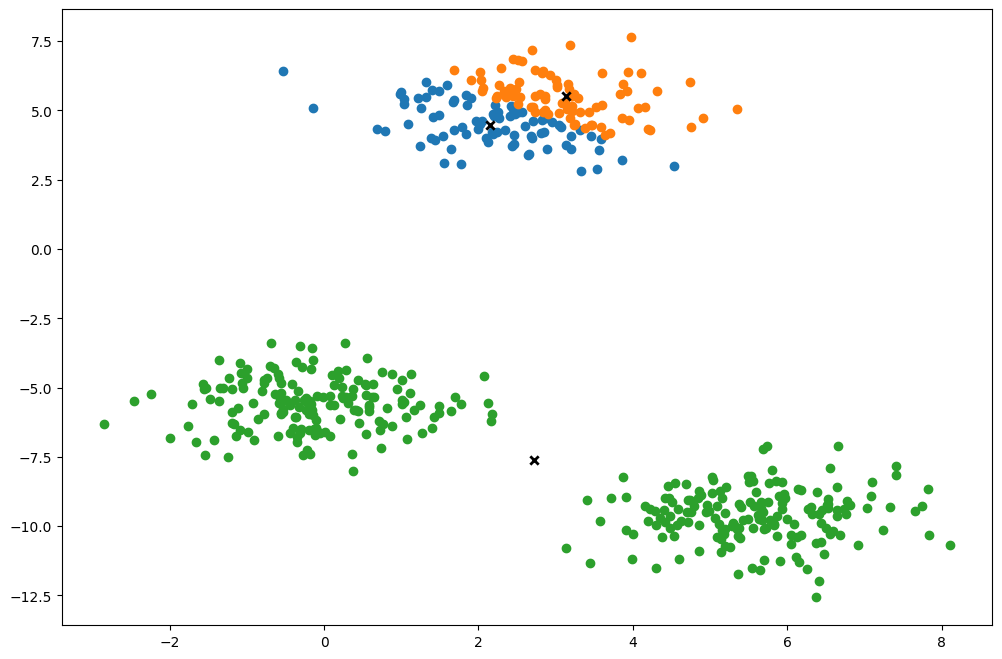

In [10]:
k = KMeans(K=clusters, max_ters=50, plot_steps=True)
y_pred = k.predict(X)
k.plot()

In [23]:
idxs = np.random.choice(100, 3,replace=False)
[X[idx] for idx in idxs]

[array([-0.27109857, -7.42095368]),
 array([3.18830994, 7.36020227]),
 array([2.21042558, 5.19463648])]